# Hands-on Image Processing with Python
## Chapter 1: Getting started with Image Processing

In [2]:
# Author: Sandipan Dey

In [1]:
% matplotlib inline
import skimage
print(skimage.__version__)

0.13.0


In [2]:
from PIL import Image
im = Image.open("../images/parrot.png")
print(im.width, im.height, im.mode, im.format, type(im))

486 362 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [3]:
from PIL import Image
image = Image.open('../images/hill.png') #open image
#image = image.convert("RGBA")  #convert to RGBA
#_, _, _, a = image.split()
#imshow(a)
image.putalpha(0)
image.show()

In [4]:
from PIL.ImageChops import subtract, multiply
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png").convert('RGB')
im = multiply(im1, im2)
im.save("../images/parrot_hill_superimpose.jpg")
im.show()

In [6]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt
im = imread("../images/Ishihara.png")
im_g = rgb2gray(im)
#print(im.shape)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(im_g, cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 452.5, 444.5, -0.5)

In [107]:
from PIL.ImageChops import subtract, multiply
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png").convert('RGB')
im = subtract(im1, im2)
im.save("../images/parrot_hill_subtract.jpg")
im.show()

In [7]:
from PIL.ImageChops import subtract, multiply, screen, difference, add
im1 = Image.open("../images/goal1.png")
im2 = Image.open("../images/goal2.png")
#im = screen(im1, im2)
im = difference(im1, im2)
#im = add(im1, im2)
im.save("./goal_diff.png")
#im.show()

plt.figure(figsize=(20,20))
plt.subplot(311)
plt.imshow(im1)
plt.axis('off')
plt.subplot(312)
plt.imshow(im2)
plt.axis('off')
plt.subplot(313)
plt.imshow(im)
plt.axis('off')
plt.show()

(-0.5, 1067.5, 547.5, -0.5)

In [9]:
import numpy as np
from skimage.io import imread
im = imread('../images/flowers2.png')
im = Image.fromarray(im) # create a PIL Image object from numpy ndarray
im.show()

In [11]:
from skimage.io import imshow, show
im = Image.open('../images/flowers2.png')
im = np.array(im)
print(type(im))
imshow(im)
plt.axis('off')
show()

<class 'numpy.ndarray'>


(-0.5, 739.5, 494.5, -0.5)

In [13]:
#coeffs = find_coeffs(
#        [(0, 0), (256, 0), (256, 256), (0, 256)],
#        [(0, 0), (256, 0), (im.width-20, im.height+20), (20, 30)])
im = Image.open("../images/parrot.png")
params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
im1 = im.transform((im.width//3, im.height), Image.PERSPECTIVE, params, Image.BICUBIC)
im1.save("../images/parrot_persp.jpg")
#im1.show()

In [14]:
im_thumbnail = im.copy()
im_thumbnail.thumbnail((100,100))
im.paste(im_thumbnail, (10,10))
im.save("../images/parrot_thumb.jpg")
im.show()

In [15]:
im.thumbnail((100,100))
im.save("../images/parrot_thumb.jpg")
im.show()

In [121]:
import PIL.ImageStat as stat
s = stat.Stat(im)
print(s.extrema)
print(s.count)
print(s.mean)
print(s.median)
print(s.stddev)

[(5, 255), (0, 255), (17, 255)]
[175932, 175932, 175932]
[212.901189095787, 220.11724984653162, 219.56982811540823]
[232, 241, 255]
[51.661924455862895, 47.79389241532308, 52.128936527352224]


In [90]:
from PIL import Image
im = Image.open("../images/parrot.png")
im.save("../images/parrot.jpg")
im = Image.open("../images/parrot.jpg")
im.show()

In [26]:
from PIL import Image
im = Image.open("../images/hill.png")
print(im.mode)
im.convert('RGB').save("../images/hill.jpg")
im = Image.open("../images/hill.jpg")
im.show()

RGBA


In [67]:
im_g = im.convert('L')                         # convert the RGB color image to a gray-scale image
im_g.save('../images/parrot_gray.png')         # save the image 
Image.open("../images/parrot_gray.png").show() # read and show the gray-scale image

In [244]:
im_1 = im.convert('1')                         # convert the RGB color image to a gray-scale image
im_1.save('../images/parrot_1.png')         # save the image 
Image.open("../images/parrot_1.png").show() # read and show the gray-scale image

In [31]:
im_45 = im.rotate(45) # rotate the image by 45 degrees
im_45.save('../images/parrot_45.png')

In [241]:
im_mirror = im.transpose(Image.FLIP_LEFT_RIGHT) # rotate the image by 45 degrees
im_mirror.save('../images/parrot_mirror.png')

In [19]:
im = Image.open("../images/parrot_45.png")
im.show()

In [20]:
im = Image.open("../images/parrot.png")
ch_r, ch_g, ch_b = im.split()
ch_r.save('../images/parrot_r.png')
ch_g.save('../images/parrot_g.png')
ch_b.save('../images/parrot_b.png')
#im = Image.merge('RGB', (ch_r, ch_g, ch_b))
im.show()

In [21]:
im = Image.merge('RGB', (ch_b, ch_g, ch_r))
im.save('../images/parrot_brswap.png')
im.show()

In [22]:
flat_ch_r = np.ravel(np.array(ch_r))
ch_r = np.interp(flat_ch_r, [0,128,255], [100,200,255]) # use linear interpolation to map pixel value 128 to 25
ch_r = np.reshape(ch_r, (im.height, im.width))
#print(ch_r.shape)
ch_r = Image.fromarray(ch_r, mode='L')
#print(ch_r.size, ch_b.size)
im = Image.merge('RGB', (ch_r, ch_g, ch_b))
im.show()

In [23]:
import numpy as np
import matplotlib.pylab as plt
#ch_r_a = np.array(ch_r)
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.xticks([]); plt.yticks([])
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.xticks([]); plt.yticks([])
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.savefig('../images/parrot_rgb.png')

In [64]:
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png")
print(im1.width, im1.height, im2.width, im2.height, im1.mode, im2.mode)
im1 = im1.convert('RGBA')
Image.blend(im1, im2, alpha=0.3).save('../images/parrot_hill.png') #.show()

486 362 486 362 RGB RGBA


In [59]:
im_c = Image.open("../images/parrot.png").crop((150,25,350,200))
im_c.save("../images/parrot_c.png")
im_c.show()

In [63]:
print(np.max(im))
im_t = im.point(lambda i: 255 - i)
im_t.save("../images/parrot_neg.png")
im_t.show()

255


In [16]:
print(im.size)

(486, 362)


In [11]:
im_g = im.convert('L')    
im_t = im_g.point(lambda i: 255*np.log(1+i/255))
im_t.save("../images/parrot_log.png")
im_t.show()

In [14]:
im_t = im_g.point(lambda i: 255*(i/255)**0.6)
im_t.save("../images/parrot_power.png")
im_t.show()

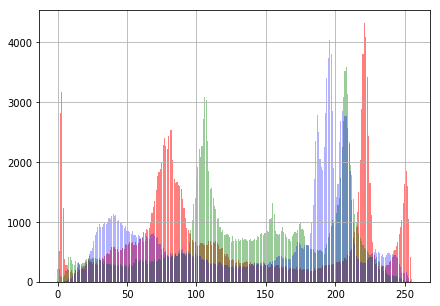

In [9]:
import matplotlib.pylab as plt
pl = im.histogram()
plt.figure(figsize=(7,5))
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.grid()
plt.show()

In [94]:
im_small = im.resize((100,100))
#im_small.show()
im.paste(im_small, (10,10))
im.save('../images/parrot_paste.png')
im.show()

In [204]:
im = Image.open("../images/clock.png")
print(im.width, im.height)
im_large = im.resize((im.width*10, im.height*10))
im_large.save('../images/clock_large.png')
im_large = im.resize((im.width*10, im.height*10), Image.BILINEAR)
im_large.save('../images/clock_large_blinear.png')
im_large = im.resize((im.width*10, im.height*10), Image.BICUBIC)
im_large.save('../images/clock_large_blcubic.png')
im_large = im.resize((im.width*10, im.height*10), Image.NEAREST)
im_large.save('../images/clock_large_nearest.png')
im_large.show()

149 97


In [216]:
im = Image.open("../images/victoria_mem.jpg")
print(im.width, im.height)
im_small = im.resize((im.width//10, im.height//10))
im_small.save('../images/victoria_small.jpg')
im_small = im.resize((im.width//10, im.height//10), Image.BILINEAR)
im_small.save('../images/victoria_small_bilinear.jpg')
im_small = im.resize((im.width//10, im.height//10), Image.ANTIALIAS)
im_small.save('../images/victoria_small_aalias.jpg')
im_small.show()
im.width*im.height / (im_small.width * im_small.height)

3872 2592


100.12893957080004

In [111]:
# choose 5000 random locations inside image
n = 5000
x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height, n)
for (x,y) in zip(x,y):
    im.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else (255,255,255))) # geenrate salt-and-pepper noise
im.save('../images/parrot_spnoise.png')
im.show()

In [130]:
from PIL import ImageFont, ImageDraw

im = Image.open("../images/parrot.png")
draw = ImageDraw.Draw(im)

# use a bitmap font
#font = ImageFont.load("arial.pil")
font = ImageFont.truetype("arial.ttf", 20)

draw.text((10, 5), "Welcome to image processing with python", font=font, fill=(255,255,255,128))
del draw

# use a truetype font
#font = ImageFont.truetype("arial.ttf", 15)

im.save('../images/parrot_text.png')
im.show()

In [145]:
# get an image
base = Image.open("../images/parrot.png").convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype('calibri.ttf', 32)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((10,10), "Welcome to image processing with", font=fnt, fill=(255,255,255,128))
# draw text, full opacity
d.text((10,60), "Python PIL", font=fnt, fill=(255,255,255,255))

out = Image.alpha_composite(base, txt)
out.save('../images/parrot_text.png')

out.show()

In [162]:
im = Image.open("../images/parrot.png")
im1 = im.transform((int(1.4*im.width), im.height), Image.AFFINE, (1,-0.5,0,0,1,0))
im1.save('../images/parrot_affine.png')
im1.show()

In [151]:
im = Image.open("../images/parrot.png")
draw = ImageDraw.Draw(im)
draw.ellipse((100, 100, 200, 250), fill=(255,255,0,128))
del draw
im.save('../images/parrot_ellipse.png')
im.show()

In [24]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
im = mpimg.imread("../images/hill.png")
print(im.shape, im.dtype, type(im))
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.show()

(362, 486, 4) float32 <class 'numpy.ndarray'>


([], <a list of 0 Text yticklabel objects>)

In [44]:
type(im)

numpy.ndarray

In [45]:
np.max(im)

1.0

In [25]:
im1 = im #np.ones(im.shape) - im
im1[im1 < 0.5] = 0
print(im1.shape, np.max(im1), np.min(im1), np.mean(im), np.mean(im1))
plt.imshow(im1)
plt.xticks([]); plt.yticks([]);
plt.tight_layout()
#plt.show()
plt.savefig("../images/hill_dark.png")

(362, 486, 4) 1.0 0.0 0.471331 0.471331


In [47]:
#np.ones((2,2,2)) - np.ones((2,2,2))*2

array([[[-1., -1.],
        [-1., -1.]],

       [[-1., -1.],
        [-1., -1.]]])

In [31]:
#% matplotlib inline
im = mpimg.imread("../images/hill_dark.png")
print(im.shape)
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
#plt.show()

(720, 720, 4)


'\nplt.figure(figsize=(10,10))\nplt.imshow(im)\nplt.xticks([])\nplt.yticks([])\nplt.tight_layout()\n'

In [32]:
from skimage.transform import warp
from skimage import data
image = data.camera()
from skimage.transform import SimilarityTransform
tform = SimilarityTransform(translation=(0, -10))
warped = warp(image, tform)
plt.axis('off')
plt.imshow(warped, cmap=plt.cm.gray)

In [33]:
from skimage import io, transform
import numpy as np

image = io.imread('../images/parrot.png')
h, w = image.shape[:2]

rng = np.random.RandomState(0)
xs = rng.randint(0, w - 1, 76)
ys = rng.randint(0, h - 1, 76)

src_pts = np.column_stack([xs, ys])
dst_pts = src_pts

tform = transform.PiecewiseAffineTransform()
tform.estimate(src_pts, dst_pts)

out = transform.warp(image, tform)

import matplotlib.pyplot as plt
plt.imshow(out)
plt.axis('off')
plt.show()

In [34]:
from skimage.io import imread, imsave
from skimage.transform import SimilarityTransform
from skimage.transform import warp
im = imread("../images/parrot.png")
print(im.shape)
tform = SimilarityTransform(scale=0.9, rotation=np.pi/4,
                               translation=(im.shape[0]/2, -100))
warped = warp(im, tform)
imsave('../images/parrot_affine.png', warped)
import matplotlib.pyplot as plt
plt.imshow(warped)
plt.axis('off')
plt.show()

(362, 486, 3)


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [35]:
import numpy as np
from scipy.ndimage import affine_transform
im = imread("../images/parrot.png")
print(im.shape)
transformed = affine_transform(im,[[np.cos(np.pi/4),np.sin(np.pi/4), 0],[-np.sin(np.pi/4),np.cos(np.pi/4), 0], [0,0,1]],
                               offset=[-im.shape[0]/2+75, im.shape[1]/2-50, 0], output_shape=im.shape)
#imsave('../images/parrot_warped.png', warped)
plt.imshow(transformed)
plt.axis('off')
plt.show()

(362, 486, 3)


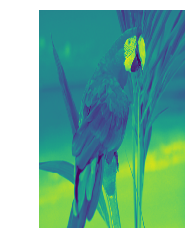

In [186]:
from scipy.ndimage import zoom
zoomed = zoom(np.mean(im, axis=2), (10,5))
plt.imshow(zoomed)
plt.axis('off')
plt.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\transform\_warps.py:412: UserWarning: The default of `mode` in `skimage.transform.swirl` will change to `reflect` in version 0.15.
  warn('The default of `mode` in `skimage.transform.swirl` '
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


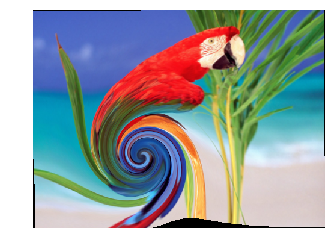

In [188]:
from skimage.transform import swirl
im = imread("../images/parrot.png")
swirled = swirl(im, rotation=0, strength=10, radius=250)
import matplotlib.pyplot as plt
imsave('../images/parrot_swirled.png', swirled)
plt.imshow(swirled)
plt.axis('off')
plt.show()

(362, 486, 3) uint8 <class 'numpy.ndarray'>


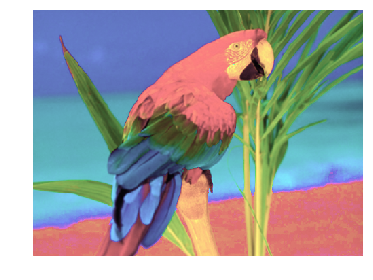

In [49]:
from skimage.io import imread, imsave, imshow, show
from skimage import color
im = imread("../images/parrot.png")
print(im.shape, im.dtype, type(im)) 
hsv = color.rgb2hsv(im) # from RGB to HSV color space
hsv[:, :, 1] = 0.5
im1 = color.hsv2rgb(hsv)
plt.axis('off')
imshow(im1)
show()
#imsave('../images/parrot_hsv.png', im1)
#plt.imshow(im1)
#plt.axis('off')
#plt.show()

In [13]:
from skimage import data, img_as_float
from skimage.util import random_noise
im =  img_as_float(imread("../images/parrot.png"))
plt.figure(figsize=(15,15))
sigmas = [0.1, 0.25, 0.5, 1]
for i in range(4): #0.1
    noisy = random_noise(im, var=sigmas[i]**2)
    #imsave('../images/parrot_noisy_gauss_0.1.png', noisy)
    plt.subplot(2,2,i+1)
    plt.imshow(noisy)
    plt.axis('off')
    plt.title('Gaussian noise with sigma=' + str(sigmas[i]), size=20)
plt.tight_layout()
#plt.show()    

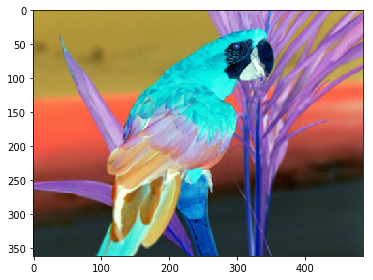

In [235]:
import skimage.io as io
from skimage.util import invert
io.imshow(invert(im))

4


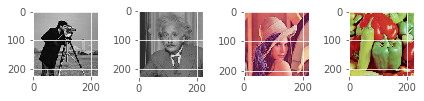

In [170]:
from skimage import io
images = io.imread_collection('../images/test/*.jpg')
print(len(images))
#plt.figure(figsize=(10,10))
io.imshow_collection(images)
io.show()

In [19]:
print(image.shape, image.dtype)

(362, 486, 3) uint8


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


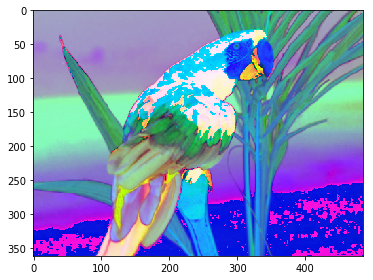

In [22]:
from skimage.io import imread, imsave, imshow, show
from skimage import color
im =  imread("../images/parrot.png")
im_hsv = color.rgb2hsv(im)
imshow(im_hsv)
imsave('../images/parrot_hsv2.png', im_hsv)
show()

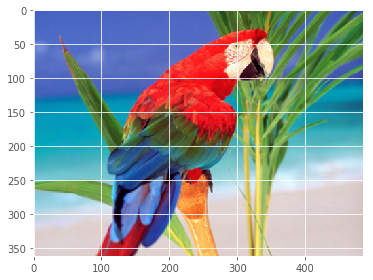

In [155]:
from skimage.io import imread, imsave, imshow, show
im =  imread("../images/parrot.png", as_gray=True)
imshow(im)
show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


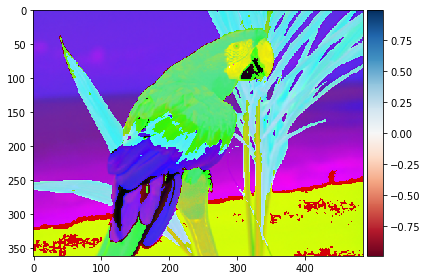

In [27]:
from skimage.io import imread, imsave, imshow, show
from skimage import color
im =  imread("../images/parrot.png")
im_yuv = color.rgb2yuv(im)
imshow(im_yuv)
imsave('../images/parrot_yuv.png', im_yuv)
show()

In [31]:
from skimage import viewer
viewer = viewer.ImageViewer(im) 
viewer.show()       

[]

(768, 1024, 3)


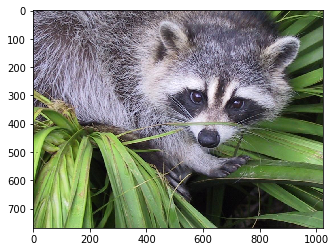

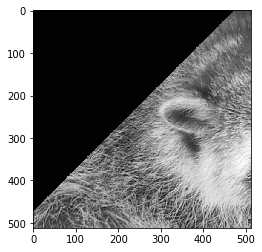

In [140]:
import numpy as np
from scipy.ndimage import affine_transform
from scipy.misc import lena, face

img = face()
print(img.shape)
rows,cols,_ = img.shape
plt.imshow(img)
plt.show()

# centre image on the origin
centre = np.identity(3)
centre[:2,2] = -rows/2.,-cols/2.

# rotate it
theta = np.deg2rad(45)
rotate = np.identity(3)
rotate[:2,:2] = [np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]

# translate it to the final position
translate = np.identity(3)
translate[:2,2] = 300,500

# compose the affine matrix
affine = np.dot(translate,np.dot(rotate,centre))

# this ought to work, but it doesn't!
rmat = affine[:2,:2]
offset = affine[:2,2]
transformed = affine_transform(np.mean(img,axis=2),rmat,offset=offset,output_shape=(512,512))
plt.imshow(transformed, cmap='gray')
plt.show()

In [1]:
import numpy as np
from skimage.io import imread
im =  imread("../images/parrot.png")
from skimage import data, exposure, img_as_float
#hi = exposure.histogram(im)
cdf_r = exposure.cumulative_distribution(im[:,:,0])
cdf_g = exposure.cumulative_distribution(im[:,:,1])
cdf_b = exposure.cumulative_distribution(im[:,:,2])
#np.alltrue(cdf[0] == np.cumsum(hi[0])/float(image.size))

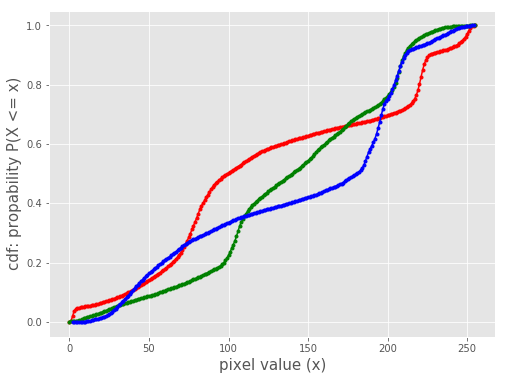

In [2]:
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(cdf_r[1], cdf_r[0], 'r.-')
plt.plot(cdf_g[1], cdf_g[0], 'g.-')
plt.plot(cdf_b[1], cdf_b[0], 'b.-')
#plt.grid()
plt.xlabel('pixel value (x)', size=15)
plt.ylabel('cdf: propability P(X <= x)', size=15)
plt.show()

In [7]:
import matplotlib.image as mpimg

In [9]:
im = mpimg.imread("../images/lena_small.jpg")  # read the image from disk as a numpy ndarray
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 30),
                         subplot_kw={'xticks': [], 'yticks': []})

#plt.figure(figsize=(20,20))

fig.subplots_adjust(hspace=0.05, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method) #, cmap='viridis')
    ax.set_title(str(interp_method))
#plt.imshow(im, interpolation='lancoz') #, cmap='viridis')
#plt.title('gaussian')
plt.tight_layout()
plt.show()

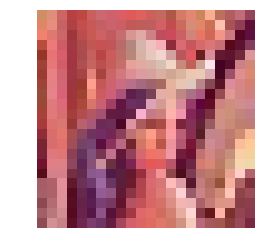

In [216]:
im = mpimg.imread("../images/lena_small.jpg")  # read the image from disk as a numpy ndarray
plt.imshow(im)
plt.axis('off')
plt.show()

In [218]:
im.shape

(22, 22, 3)

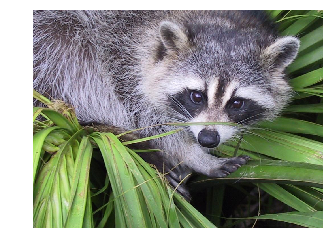

In [223]:
from scipy import misc
l = misc.face()
misc.imsave('../images/face.png', l) # uses the Image module (PIL)

import matplotlib.pylab as plt
plt.imshow(l)
plt.axis('off')
plt.show()

(226, 223)


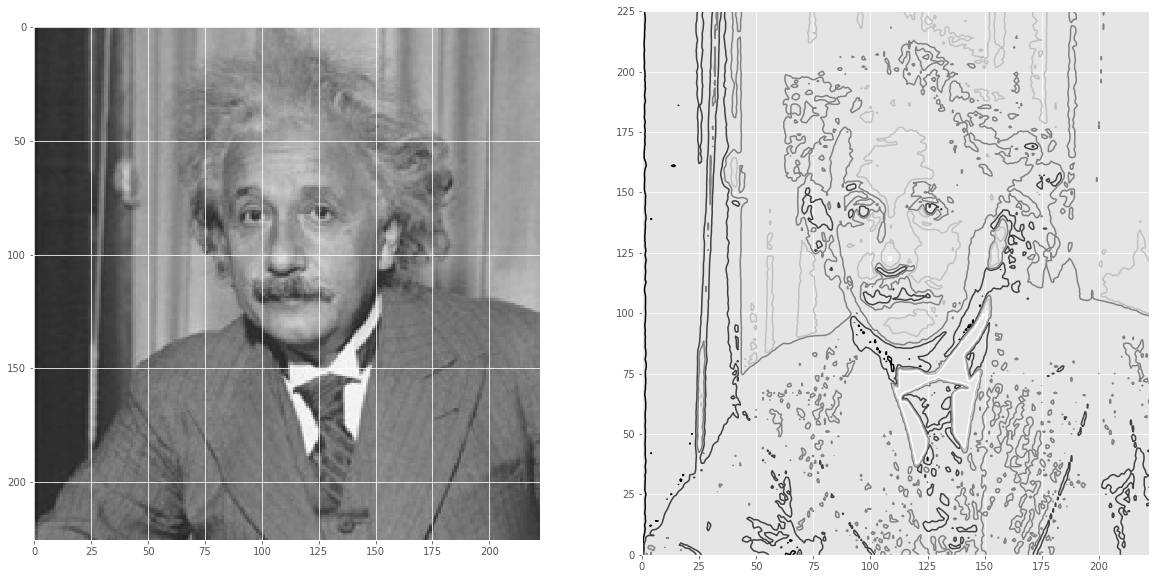

In [260]:
im = rgb2gray(imread("../images/einstein.jpg"))  # read the image from disk as a numpy ndarray
print(im.shape)
plt.gray()
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
#plt.imshow(im, vmin=50, vmax=200)
plt.contour(np.flipud(im))
plt.show()

In [14]:
lena = mpimg.imread("../images/lena.jpg")  # read the image from disk as a numpy ndarray
print(lena[0, 40])

# Slicing
print(lena[10:13, 20:23,0:1])

lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
lena[mask,:] = 0
# Fancy indexing
#lena[range(400), range(400)] = 255
plt.figure(figsize=(10,10))
#plt.gray()
plt.imshow(lena)
plt.axis('off')
plt.show()

[180  76  83]
[[[232]
  [234]
  [231]]

 [[232]
  [236]
  [233]]

 [[234]
  [236]
  [234]]]


(-0.5, 219.5, 219.5, -0.5)

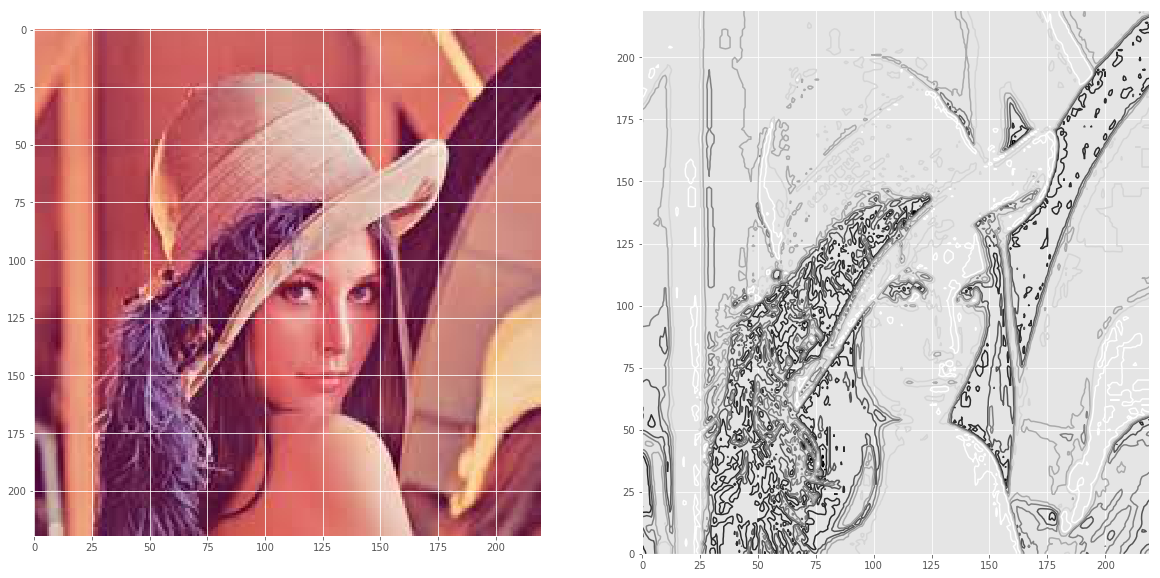

In [273]:
im = mpimg.imread("../images/lena.jpg") 
#plt.gray()
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
C =  plt.contour(np.flipud(im[...,0]))
print(C)
plt.show()

In [10]:
im1 = mpimg.imread("../images/messi.png") 
im2 = mpimg.imread("../images/ronaldo.png") 
i = 1
plt.figure(figsize=(18,20))
for alpha in np.linspace(0,1,20):
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

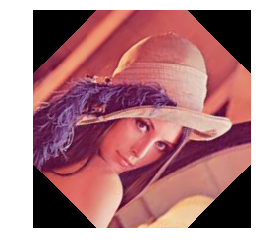

In [287]:
from scipy.misc import imread, imrotate, imresize
im = mpimg.imread("../images/lena.jpg") 
im = imrotate(im, -45)
plt.imshow(im)
plt.axis('off')
plt.show()

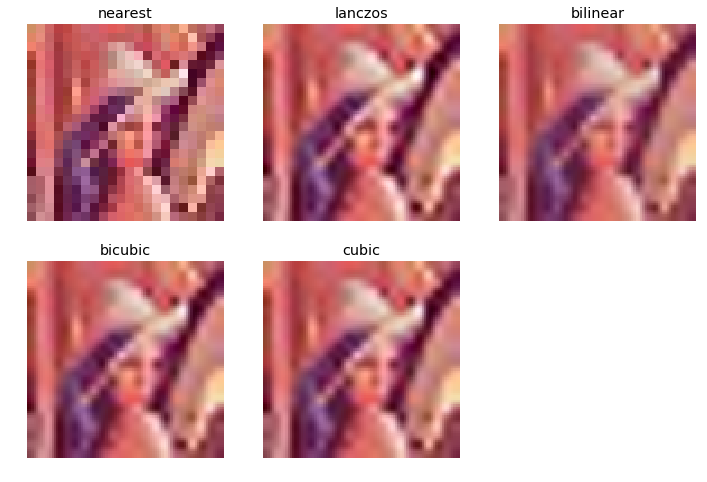

In [299]:
from scipy import misc
im = misc.imread("../images/lena_small.jpg") 
plt.figure(figsize=(12,8))
i = 1
for interp in ['nearest', 'lanczos', 'bilinear', 'bicubic', 'cubic']:
    im1 = misc.imresize(im, size=4., interp=interp) # 4 times
    plt.subplot(2,3,i)
    plt.imshow(im1)
    plt.axis('off')
    plt.title(interp)
    i += 1
plt.show()

In [308]:
im = misc.imread('../images/veg.jpg')
print(type(im), im.shape, im.dtype)

<class 'numpy.ndarray'> (225, 225, 3) uint8


<class 'imageio.core.util.Image'> (225, 225, 3) uint8


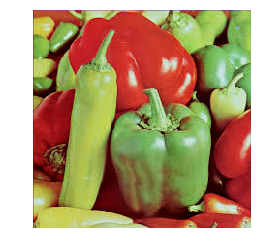

In [311]:
import imageio
#import visvis as vv

im2 = imageio.imread('../images/veg.jpg')
print(type(im2), im.shape, im.dtype)
#vv.imshow(im)

plt.imshow(im2)
plt.axis('off')
plt.show()

In [306]:
#!pip install visvis

In [326]:
im = imread('../images/lena.jpg')
print(im.shape)
im.tofile('lena.raw') # Create raw file

(220, 220, 3)


In [ ]:
im_from_raw = np.fromfile('lena.raw', dtype=np.uint8)
print(im_from_raw.shape)
im_from_raw.shape = (220, 220, 3)
plt.imshow(im_from_raw)
plt.axis('off')
plt.show()
import os
os.remove('lena.raw')

In [330]:
lena_memmap = np.memmap('lena.raw', dtype=np.int64, shape=(220, 220, 3))
print(lena_memmap.shape, type(lena_memmap))

(220, 220, 3) <class 'numpy.core.memmap.memmap'>
